<a href="https://colab.research.google.com/github/Kekkles1/BI-Colab/blob/zara/data_profiling_assig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the Data

This data is about two hotels named 'Resort Hotel' and 'City Hotel' in which information related to their bookings is given. This booking data consists of their cancellations, time that a customer takes from reserving a room till their arrival at the hotel, the arrival dates, customers that stay in on weekend or week nights, the customer group consists of how many adults, children and babies, what is the customers meal choice, what country do they belong to, what was their booking channel and through what source did they book the room.

# Descriptive Statistics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Setting styles - You can skip this, this will add gridlines for better readability.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [5]:
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
file_path = '/content/drive/MyDrive/hotel_bookings_dirty.csv'
df = pd.read_csv(file_path)

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,NaN,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,NaN,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,NaN,Transient,0.0,0.0,0.0,Check-Out,07/01/2015
2,Resort Hotel,0.0,7.0,2015.0,July,NaN,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,NaN,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,NaN,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,NaN,Transient,98.0,0.0,1.0,Check-Out,03/07/2015


In [8]:
df.dtypes

,0
hotel,object
is_canceled,float64
lead_time,float64
arrival_date_year,float64
arrival_date_month,object
arrival_date_week_number,float64
arrival_date_day_of_month,float64
stays_in_weekend_nights,float64
stays_in_week_nights,float64
adults,float64


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')


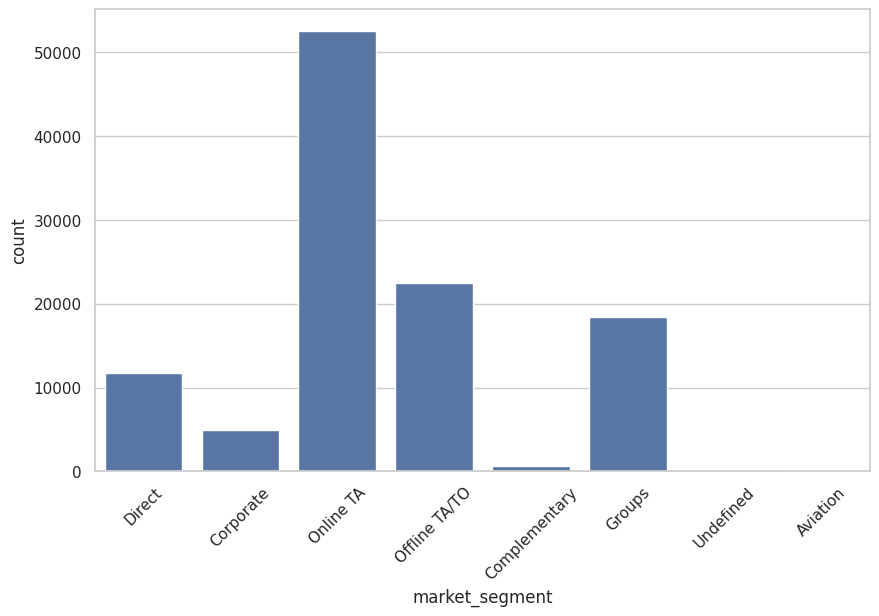

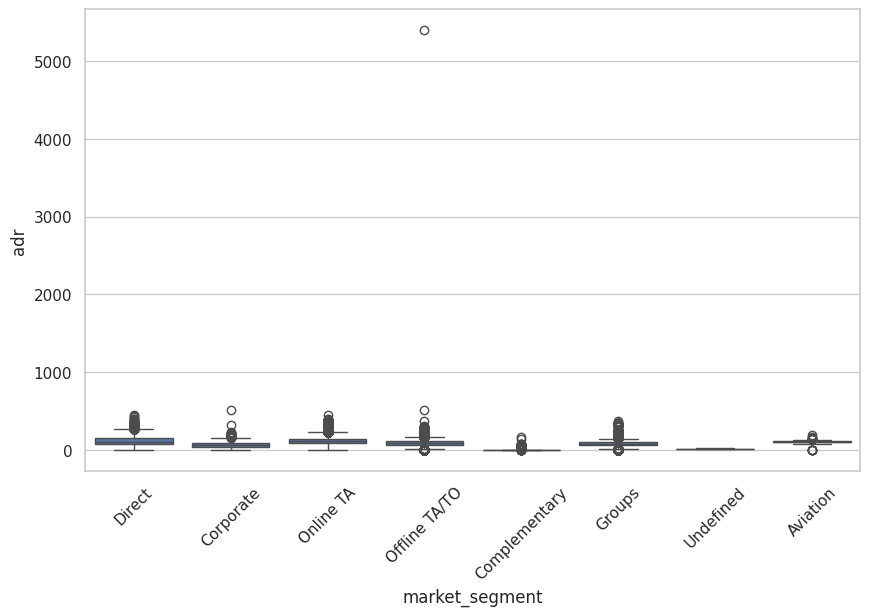

In [10]:
#Frequency counts,
#proportions,
#mode,
df.describe(include=['object'])

#bar plots,
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment', data=df)
plt.xticks(rotation=45)
plt.show()

#missing values
# To check for missing values in each column
df.isnull().sum()
# To check for the percentage of missing values in each column
df.isnull().mean() * 100

#cross-tabulations.
pd.crosstab(df['market_segment'], df['distribution_channel'])
#do meal with customer types, market segmen, country
#or just do correlation of them

#change agent and company to categorical for analysis (can do networthbillion analysis on it):
# Example: Convert 'lead_time' from numerical to object dtype
df['lead_time'] = df['lead_time'].astype('object')
# You can verify the change using:
df.dtypes

#can plot boxplots of num col (fact) across a dimension
plt.figure(figsize=(10, 6))
sns.boxplot(x='market_segment', y='adr', data=df)
plt.xticks(rotation=45)
plt.show()

In [11]:
df.describe(include=['object'])

,hotel,lead_time,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119380,111018.0,119379,119376,118889,111018,119374,119351,119324,119375,119376,119374,119375
unique,2,476.0,12,6,177,8,5,10,12,4,5,3,2317
top,City Hotel,0.0,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015
freq,79322,5923.0,13875,83020,48583,52528,97857,85963,74016,104628,80691,75155,1284


In [12]:
# creating a table for 'meal' column with count and count in percentage:
mcount = df['meal'].value_counts()
mpercent = df['meal'].value_counts(normalize=True) * 100
meal_summary = pd.DataFrame({
    'count': mcount,
    'count%': mpercent.round(2)
})

meal_summary

,count,count%
meal,,
BB,83020,69.54
HB,13043,10.93
Invalid,11942,10.00
SC,9584,8.03
Undefined,1078,0.90
FB,709,0.59


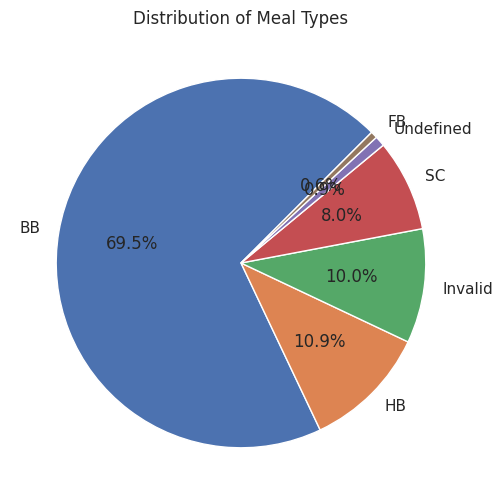

In [13]:
plt.figure(figsize=(10, 6))
plt.pie(mpercent.round(2), labels=mpercent.index, autopct='%1.1f%%', startangle=45)
_ = plt.title('Distribution of Meal Types')


In the 'meal' column, the most popular

In [14]:
#should we remove undefined and invalid from 'meal'?

In [15]:
df['arrival_date_month'].value_counts()

,count
arrival_date_month,
August,13875
July,12660
May,11788
October,11159
April,11089
June,10937
September,10508
March,9793
February,8067


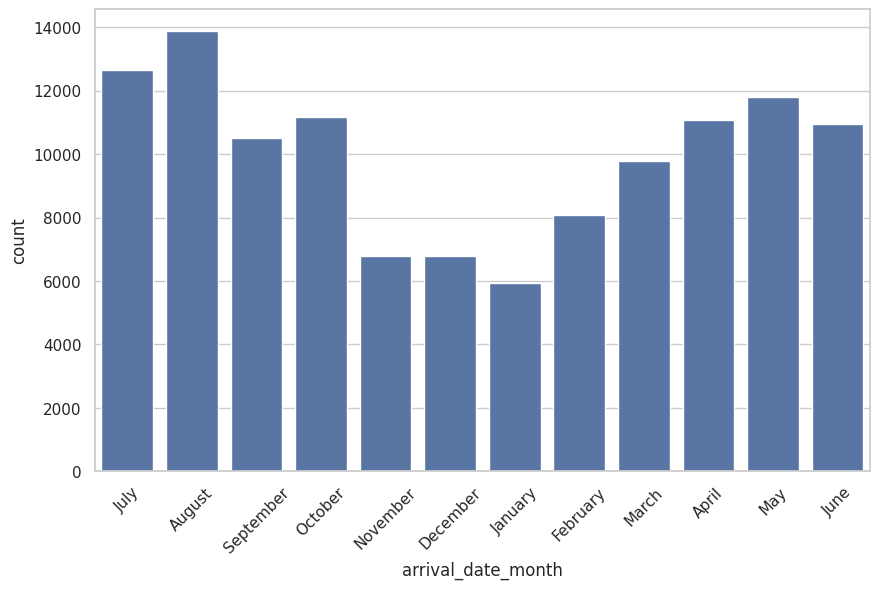

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_date_month', data=df)
plt.xticks(rotation=45)
plt.show()

In [17]:
# creating a table for 'meal' column with count and count in percentage:
ccount = df['country'].value_counts()
cpercent = df['country'].value_counts(normalize=True) * 100
country_summary = pd.DataFrame({
    'count': ccount,
    'count%': cpercent.round(2)
})
country_summary


,count,count%
country,,
PRT,48583,40.86
GBR,12128,10.20
FRA,10413,8.76
ESP,8568,7.21
DEU,7287,6.13
...,...,...
DJI,1,0.00
BWA,1,0.00
HND,1,0.00


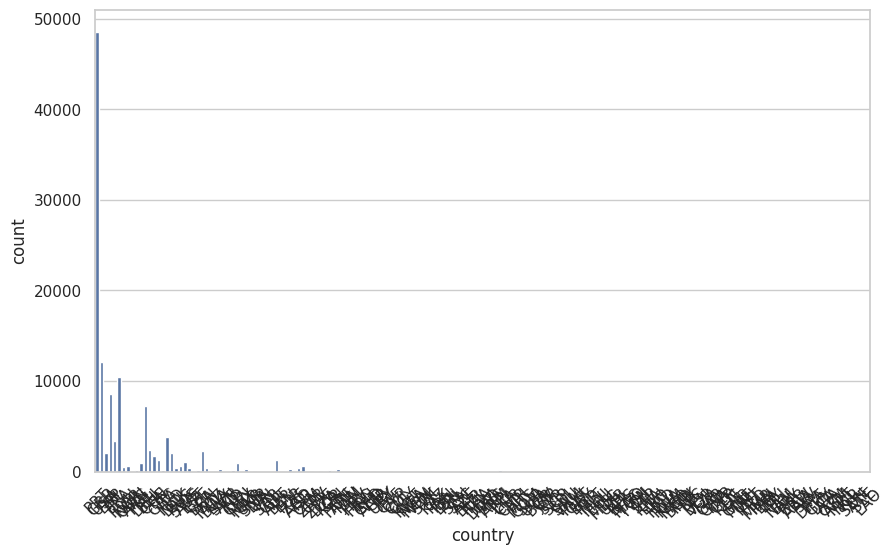

In [18]:
#normal country bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=df)
plt.xticks(rotation=45)
plt.show()

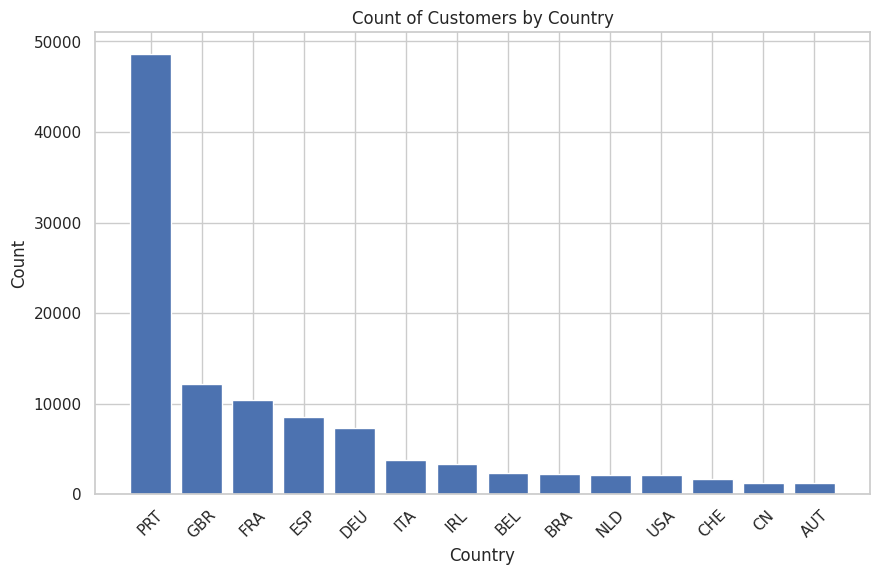

In [19]:
#only looking at countries with customer count greater than 1% to see why
filtered_country = country_summary[country_summary['count%'] > 1.0]
plt.figure(figsize=(10, 6))
plt.bar(filtered_country.index, filtered_country['count'])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Customers by Country')
plt.xticks(rotation=45)
plt.show()

In [20]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,52528
Offline TA/TO,22540
Groups,18422
Direct,11700
Corporate,4920
Complementary,692
Aviation,214
Undefined,2


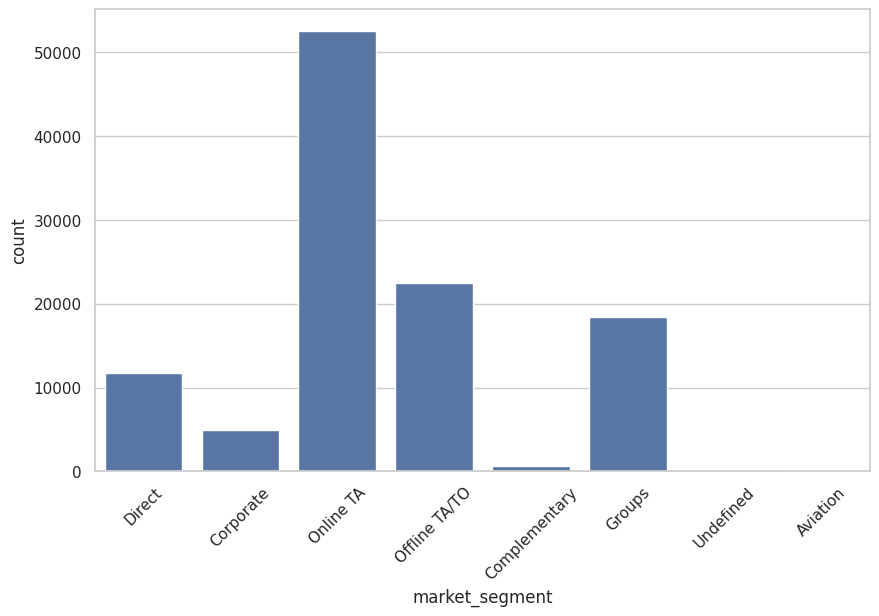

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment', data=df)
plt.xticks(rotation=45)
plt.show()
#can we remove 'undefined' rows?

In [22]:
df['distribution_channel'].value_counts()

,count
distribution_channel,
TA/TO,97857
Direct,14643
Corporate,6676
GDS,193
Undefined,5


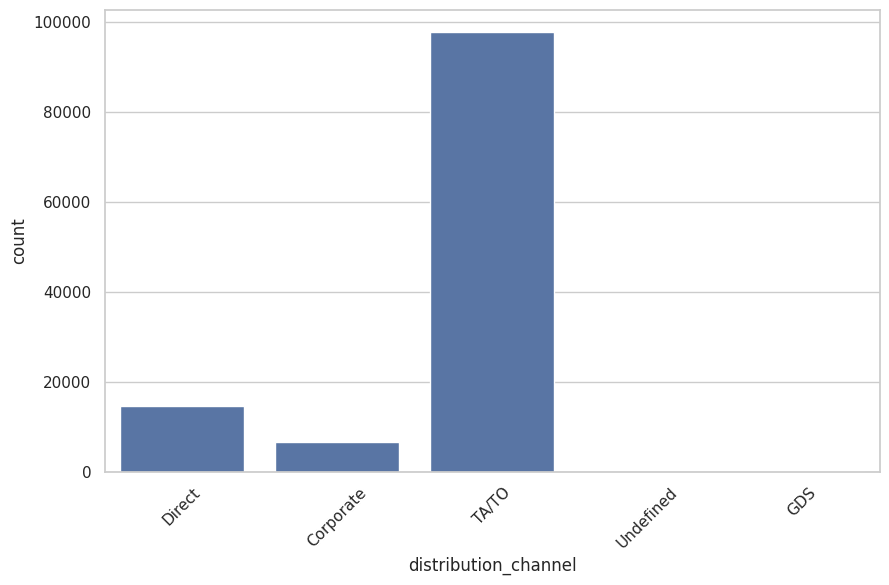

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='distribution_channel', data=df)
plt.xticks(rotation=45)
plt.show()
#again, we need to remove undefined rows

In [24]:
#to see what market segment uses what and how much of a distribution channel
pd.crosstab(df['market_segment'], df['distribution_channel'])

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
market_segment,,,,,
Aviation,204,0,0,10,0
Complementary,83,537,0,72,0
Corporate,4451,156,0,313,0
Direct,83,11404,1,210,2
Groups,1139,1368,0,15914,0
Offline TA/TO,197,15,41,22286,0
Online TA,42,123,134,52228,1
Undefined,0,0,0,0,2


<Axes: xlabel='distribution_channel', ylabel='market_segment'>

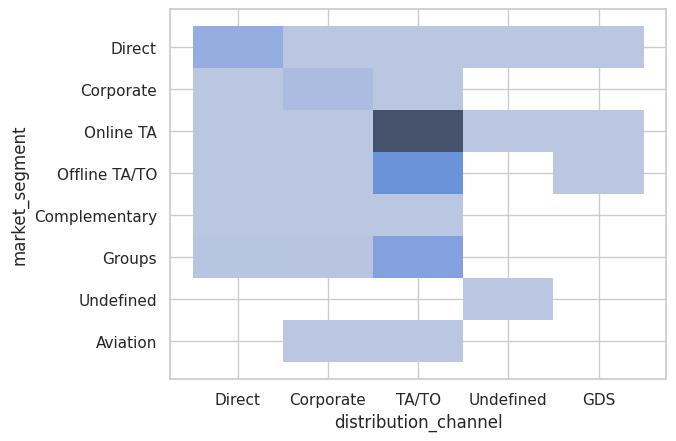

In [25]:
#this is just a way to show it visually
sns.histplot(df, x='distribution_channel', y='market_segment')

In [26]:
df['reserved_room_type'].value_counts()

,count
reserved_room_type,
A,85963
D,19196
E,6533
F,2896
G,2094
B,1118
C,932
H,601
P,12


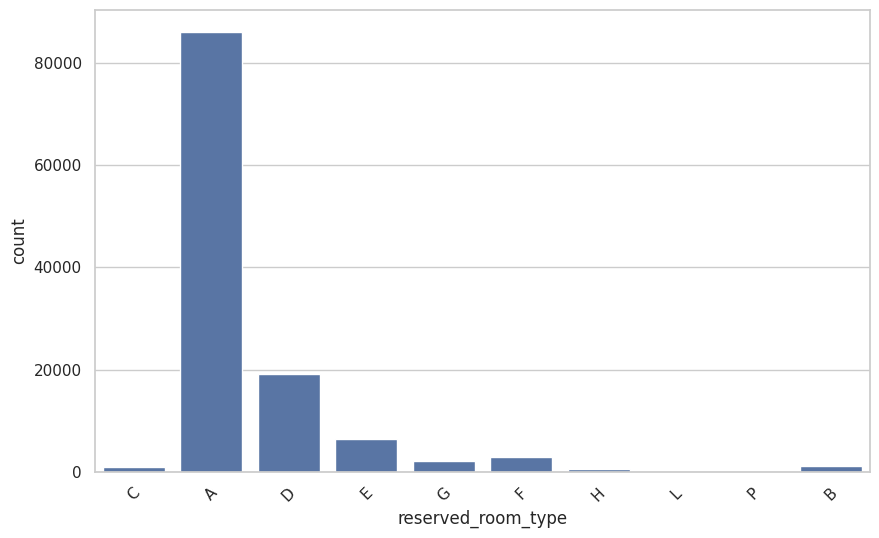

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='reserved_room_type', data=df)
plt.xticks(rotation=45)
plt.show()
#L and P reserved the least

In [28]:
df['assigned_room_type'].value_counts()
#has extra room type of 'I' and 'K'

,count
assigned_room_type,
A,74016
D,25313
E,7800
F,3746
G,2550
C,2372
B,2163
H,710
I,363


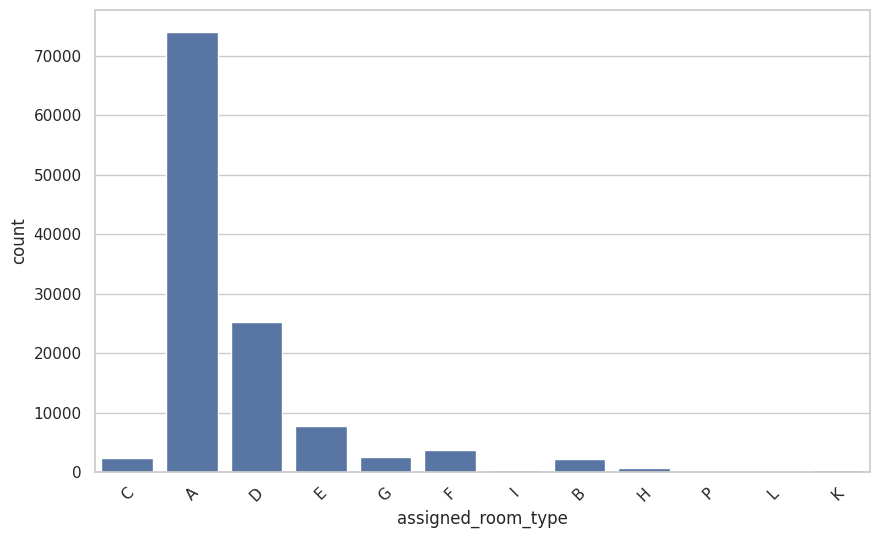

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='assigned_room_type', data=df)
plt.xticks(rotation=45)
plt.show()

In [30]:
#rooms that were reserved but were not assigned
unused = df['reserved_room_type'].value_counts() - df['assigned_room_type'].value_counts()

In [31]:
diff_df = pd.DataFrame({
    'room_type': unused.index,
    'diff': unused.values
})
diff_df

,room_type,diff
0,A,11947.0
1,B,-1045.0
2,C,-1440.0
3,D,-6117.0
4,E,-1267.0
5,F,-850.0
6,G,-456.0
7,H,-109.0
8,I,NaN
9,K,NaN


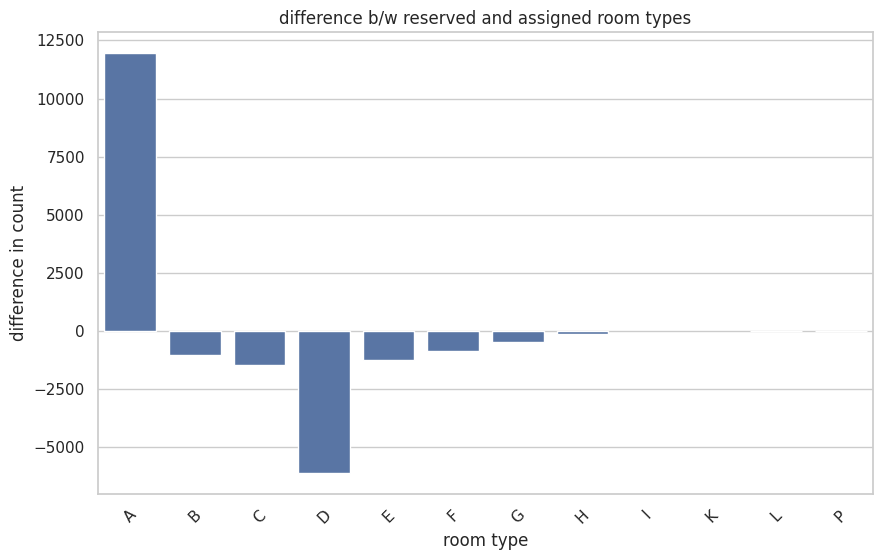

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='room_type', y='diff', data=diff_df)
plt.title('difference b/w reserved and assigned room types')
plt.xlabel('room type')
plt.ylabel('difference in count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
#we see that except for room type A all other room types were assigned more than they were reserved
#I and K are the only ones given only when assigned

The difference shows that except for room type 'A' all the other room types were assigned to more customers on hand without actually reserving for that room type beforehand.

In [33]:
df['deposit_type'].value_counts()

,count
deposit_type,
No Deposit,104628
Non Refund,14584
Refundable,162
No Depo,1


The 'no depo' might just be a human error since 'no depo' means 'no deposit' hence we change its type to 'no deposit'

In [34]:
df[df['deposit_type'] == 'No Depo']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
104,Resort Hotel,0.0,102.0,2015.0,July,NaN,4.0,2.0,5.0,2.0,...,No Depo,240.0,NaN,NaN,Transient,96.3,0.0,1.0,Check-Out,11/07/2015


In [35]:
#changing the no_depo type to no_deposit cause that is the same thing
df['deposit_type'] = df['deposit_type'].replace('No Depo', 'No Deposit')
df['deposit_type'].value_counts()

,count
deposit_type,
No Deposit,104629
Non Refund,14584
Refundable,162


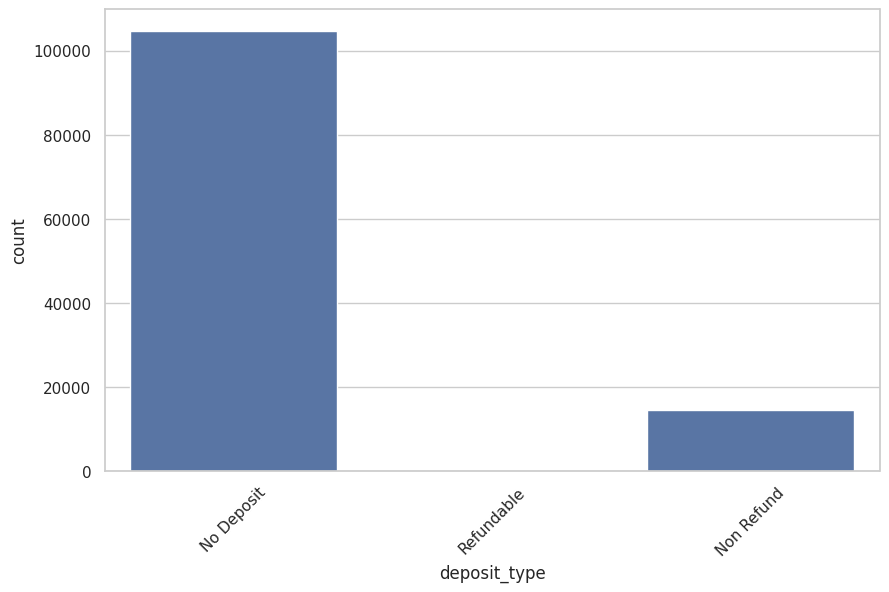

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='deposit_type', data=df)
plt.xticks(rotation=45)
plt.show()

In this bar chart the 'Refundable' type in deposit_type is especially very low than 'No Deposit' and 'Non Refund' types

In [37]:
df[df['deposit_type'] == 'Refundable']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1559,Resort Hotel,0.0,14.0,2015.0,September,NaN,4.0,0.0,2.0,3.0,...,Refundable,96.0,NaN,0.0,Transient-Party,128.0,1.0,0.0,Check-Out,06/09/2015
4737,Resort Hotel,0.0,169.0,2016.0,March,NaN,31.0,0.0,3.0,NaN,...,Refundable,NaN,223.0,0.0,Transient-Party,66.0,0.0,0.0,Check-Out,03-Apr-16
4738,Resort Hotel,0.0,169.0,2016.0,March,NaN,31.0,0.0,3.0,NaN,...,Refundable,NaN,223.0,NaN,Transient-Party,66.0,0.0,0.0,Check-Out,03/04/2016
4739,Resort Hotel,0.0,169.0,2016.0,March,NaN,31.0,0.0,3.0,2.0,...,Refundable,NaN,223.0,NaN,Transient-Party,66.0,0.0,0.0,Check-Out,03/04/2016
4740,Resort Hotel,0.0,169.0,2016.0,March,NaN,31.0,0.0,3.0,2.0,...,Refundable,NaN,223.0,NaN,Transient-Party,66.0,0.0,0.0,Check-Out,03/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79652,City Hotel,0.0,0.0,2015.0,October,NaN,30.0,0.0,2.0,1.0,...,Refundable,63.0,NaN,0.0,Unknown,85.0,0.0,0.0,Check-Out,01-Nov-15
79980,City Hotel,0.0,29.0,2015.0,November,NaN,6.0,1.0,2.0,2.0,...,Refundable,22.0,NaN,NaN,Transient-Party,63.0,0.0,0.0,Check-Out,09/11/2015
85497,City Hotel,0.0,51.0,2016.0,March,NaN,16.0,0.0,1.0,1.0,...,Refundable,NaN,185.0,0.0,Transient-Party,85.5,0.0,0.0,Check-Out,17/03/2016
85498,City Hotel,0.0,51.0,2016.0,March,NaN,16.0,0.0,1.0,1.0,...,Refundable,NaN,185.0,NaN,Transient-Party,85.5,0.0,0.0,Check-Out,03/17/2016


In [38]:
pd.crosstab(df['market_segment'], df['deposit_type'], normalize='all') * 100

deposit_type,No Deposit,Non Refund,Refundable
market_segment,,,
Aviation,0.192765,0.000000,0.000000
Complementary,0.623334,0.000000,0.000000
Corporate,4.152555,0.275636,0.003603
Direct,10.520105,0.014412,0.004504
Groups,8.801434,7.686279,0.105390
Offline TA/TO,16.122000,4.176875,0.003603
Online TA,47.254450,0.047741,0.013512
Undefined,0.001802,0.000000,0.000000


Here we can see that the 'Refundable' deposit type is being used mostly by 'Groups'. This shows that if we market the 'Refundable' type more towards 'Groups' there is potential that the amount of hotel bookings increase through 'Groups'.

In [39]:
custcounts = df['customer_type'].value_counts()
custcounts

,count
customer_type,
Transient,80691
Transient-Party,22619
Unknown,11879
Contract,3653
Group,534


In [40]:
#checking customer_types that use rooms I and K
assigRoomIK = df[df['assigned_room_type'].isin(['I','K'])]
custcountsIK = assigRoomIK['customer_type'].value_counts()
custcountsIK

,count
customer_type,
Transient,422
Transient-Party,128
Unknown,68
Contract,15
Group,8


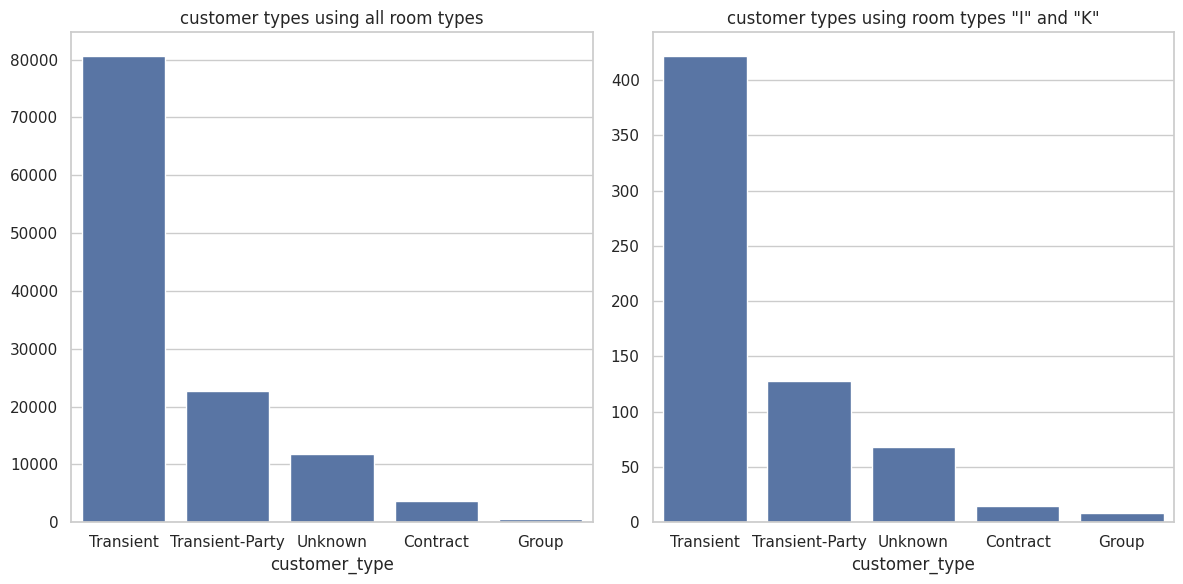

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x=custcounts.index, y=custcounts.values, ax=axs[0])
axs[0].set_title('customer types using all room types')

sns.barplot(x=custcountsIK.index, y=custcountsIK.values, ax=axs[1])
axs[1].set_title('customer types using room types "I" and "K"')

plt.tight_layout()
plt.show()

In [42]:
canceled_df = df['is_canceled'].map({0.0: 'No', 1.0: 'Yes'})
pd.crosstab(df['reserved_room_type'], canceled_df)

is_canceled,No,Yes
reserved_room_type,,
A,52357,33603
B,750,368
C,624,308
D,13097,6098
E,4620,1913
F,2016,880
G,1331,763
H,356,245
L,4,2


In [43]:
room_res_status = pd.crosstab(df['reserved_room_type'],df['reservation_status'] )
room_res_status

reservation_status,Canceled,Check-Out,No-Show
reserved_room_type,,,
A,32729,52356,874
B,353,750,15
C,300,624,8
D,5910,13096,188
E,1843,4620,70
F,843,2016,37
G,754,1331,9
H,239,356,6
L,2,4,0


<Figure size 1000x600 with 0 Axes>

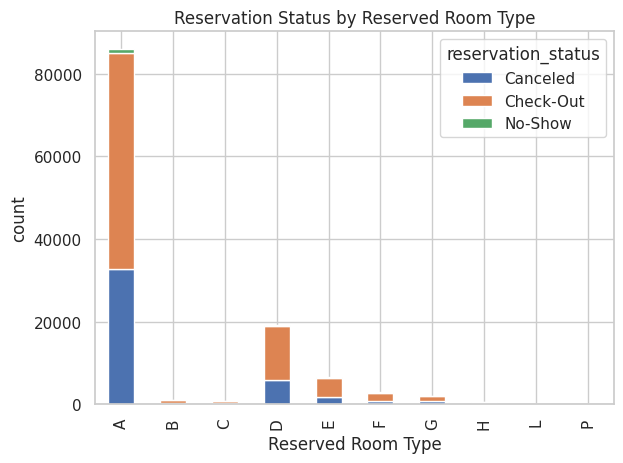

In [44]:
plt.figure(figsize=(10, 6))
room_res_status.plot(kind='bar', stacked=True)
plt.title("Reservation Status by Reserved Room Type")
plt.xlabel("Reserved Room Type")
plt.ylabel("count")
plt.tight_layout()
plt.show()

In [45]:
#is canceled with assigned room types
#I and K room type with customer types and market segment
#also check I and K with special requests

In [46]:
df.groupby('customer_type')['adr'].mean()

,adr
customer_type,
Contract,87.594897
Group,84.792397
Transient,106.943037
Transient-Party,86.107720
Unknown,102.178773


<Axes: xlabel='distribution_channel', ylabel='market_segment'>

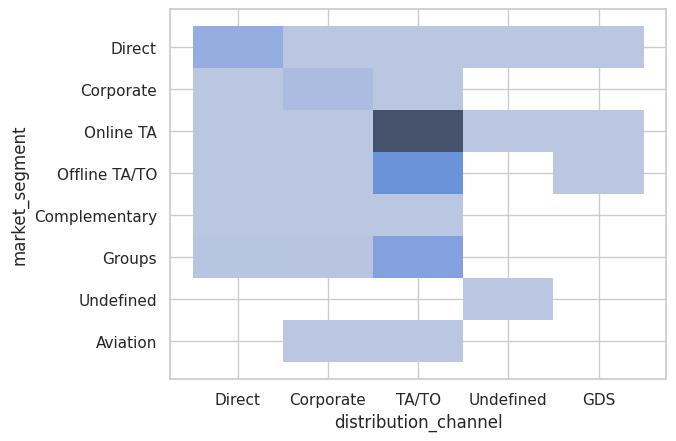

In [47]:
sns.histplot(df, x='distribution_channel', y='market_segment')

In [48]:
# Example: Grouping by 'market_segment' and finding the mean of 'adr' (average daily rate)
#df.groupby('market_segment')['adr'].mean()

# Grouping by multiple categories
df.groupby(['market_segment', 'distribution_channel'])['adr'].mean()


market_segment  distribution_channel
Aviation        Corporate               100.170000
                TA/TO                    95.500000
Complementary   Corporate                 0.077108
                Direct                    2.275698
                TA/TO                     8.575972
Corporate       Corporate                67.715084
                Direct                   70.220064
                TA/TO                    91.023674
Direct          Corporate                61.800843
                Direct                  115.820255
                GDS                     114.000000
                TA/TO                   109.739762
                Undefined                62.350000
Groups          Corporate                66.320615
                Direct                   75.516031
                TA/TO                    80.711688
Offline TA/TO   Corporate               112.116751
                Direct                   82.008667
                GDS                     118.751951
                TA/TO                    87.158921
Online TA       Corporate               102.903571
                Direct                  102.341057
                GDS                     119.822015
                TA/TO                   117.209350
                Undefined                76.500000
Undefined       Undefined                15.000000
Name: adr, dtype: float64

In [49]:
pd.crosstab(df['market_segment'], df['distribution_channel'])

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
market_segment,,,,,
Aviation,204,0,0,10,0
Complementary,83,537,0,72,0
Corporate,4451,156,0,313,0
Direct,83,11404,1,210,2
Groups,1139,1368,0,15914,0
Offline TA/TO,197,15,41,22286,0
Online TA,42,123,134,52228,1
Undefined,0,0,0,0,2


In [50]:
pd.crosstab(df['market_segment'], df['distribution_channel'], values=df['adr'], aggfunc='sum')

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
market_segment,,,,,
Aviation,20434.68,NaN,NaN,955.00,NaN
Complementary,6.40,1222.05,NaN,617.47,NaN
Corporate,301399.84,10954.33,NaN,28490.41,NaN
Direct,5129.47,1320814.19,114.00,23045.35,124.7
Groups,75539.18,103305.93,NaN,1284445.80,NaN
Offline TA/TO,22087.00,1230.13,4868.83,1942423.71,NaN
Online TA,4321.95,12587.95,16056.15,6121609.94,76.5
Undefined,NaN,NaN,NaN,NaN,30.0


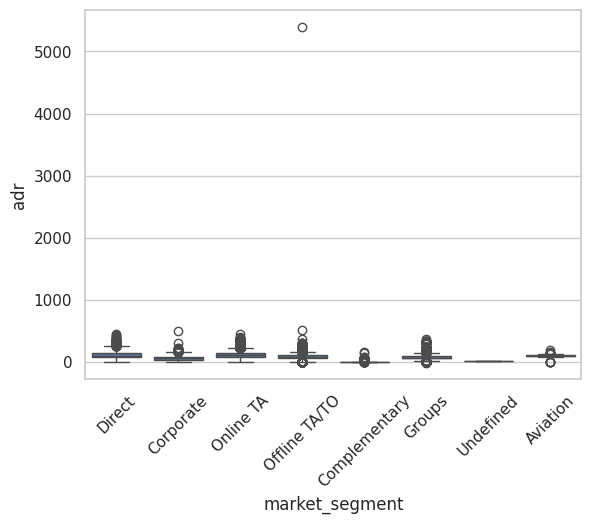

In [51]:
sns.boxplot(x='market_segment', y='adr', data=df)
plt.xticks(rotation=45)
plt.show()

# Wrangling the Data

In [52]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,NaN,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,NaN,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,NaN,Transient,0.0,0.0,0.0,Check-Out,07/01/2015
2,Resort Hotel,0.0,7.0,2015.0,July,NaN,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,NaN,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,NaN,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,NaN,Transient,98.0,0.0,1.0,Check-Out,03/07/2015


In [53]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [54]:
df.iloc[:,:]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,NaN,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,NaN,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,NaN,Transient,0.00,0.0,0.0,Check-Out,07/01/2015
2,Resort Hotel,0.0,7.0,2015.0,July,NaN,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,NaN,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,NaN,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,NaN,Transient,98.00,0.0,1.0,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0.0,23.0,2017.0,August,NaN,30.0,2.0,5.0,2.0,...,No Deposit,394.0,NaN,NaN,Transient,96.14,0.0,0.0,Check-Out,06/09/2017
119386,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2.0,5.0,NaN,...,No Deposit,9.0,NaN,0.0,Transient,225.43,0.0,2.0,Check-Out,07/09/2017
119387,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,No Deposit,9.0,NaN,NaN,Transient,157.71,0.0,4.0,Check-Out,07/09/2017
119388,City Hotel,0.0,NaN,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,No Deposit,89.0,NaN,NaN,Transient,104.40,0.0,0.0,Check-Out,07/09/2017


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119380 non-null  object 
 1   is_canceled                     119378 non-null  float64
 2   lead_time                       111018 non-null  object 
 3   arrival_date_year               119376 non-null  float64
 4   arrival_date_month              119379 non-null  object 
 5   arrival_date_week_number        29845 non-null   float64
 6   arrival_date_day_of_month       119374 non-null  float64
 7   stays_in_weekend_nights         119377 non-null  float64
 8   stays_in_week_nights            119375 non-null  float64
 9   adults                          107437 non-null  float64
 10  children                        111016 non-null  float64
 11  babies                          119375 non-null  float64
 12  meal            

In [56]:
df.describe()

,is_canceled,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119378.000000,119376.000000,29845.000000,119374.000000,119377.000000,119375.000000,107437.000000,111016.000000,119375.000000,119377.000000,119377.000000,119376.000000,95503.000000,103038.000000,6795.000000,29847.000000,119377.000000,119374.000000,119373.000000
mean,0.370420,2016.156991,27.186899,15.798465,0.927624,2.500323,1.856521,0.103778,0.007950,0.031916,0.087127,0.137113,0.221124,86.691793,189.286976,2.215901,101.830816,0.062526,0.571385
std,0.482919,0.710801,13.527545,8.780895,0.998636,1.908340,0.565173,0.398386,0.097442,0.175776,0.844382,1.497524,0.652867,110.772042,131.665904,17.009015,50.537010,0.245307,0.792820
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.250000,0.000000,0.000000
50%,0.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,2027.000000,53.000000,31.000000,19.000000,50.000000,50.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [57]:
df['adr'].mean()

101.83081573502434

In [58]:
# Filtering data
filtered_data = df[df['adr'] >df['adr'].mean() ]
# Display columns - list of column names
filtered_data[['hotel','booking_changes','adr']]
# sort results

,hotel,booking_changes,adr
6,Resort Hotel,0.0,107.00
7,Resort Hotel,NaN,103.00
9,Resort Hotel,NaN,105.50
10,Resort Hotel,0.0,123.00
11,Resort Hotel,NaN,145.00
...,...,...,...
119382,City Hotel,0.0,209.00
119386,City Hotel,0.0,225.43
119387,City Hotel,0.0,157.71
119388,City Hotel,0.0,104.40


# Correlation Analysis

# Hypothesis Testing

# Cluster Analysis

# Clustering Task